# DV Python Question- 5

Recreate the Covid data source from the two .csv. files that you can download from the page Recreating the COVID Data Source from Scratch in this module (5 points).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_2020 = pd.read_csv('2020 Cases only.csv',low_memory = False)
df_2021 = pd.read_csv('2021 Cases only.csv',low_memory = False)
df_all = pd.concat([df_2020,df_2021])
c_all = df_all.groupby(['EventDate']).count()
print(c_all.head)

<bound method NDFrame.head of            OBJECTID  County    Age  Age_group  Gender  Jurisdicti  Travel_rel  \
EventDate                                                                       
1/1/2020          0      21     21         21      21          21          21   
1/1/2021          0   13720  13719      13720   13720       13720       13720   
1/10/2020         0       2      2          2       2           2           2   
1/10/2021         0   11694  11693      11694   11694       11694       11694   
1/11/2021         0   14249  14245      14249   14249       14249       14249   
...             ...     ...    ...        ...     ...         ...         ...   
9/5/2020          0    2545   2544       2545    2545        2545        2545   
9/6/2020          0    2217   2217       2217    2217        2217        2217   
9/7/2020          0    2478   2477       2478    2478        2478        2478   
9/8/2020          0    2699   2698       2699    2699        2699        2699  

In [2]:
type(c_all.index[0])

str

In [5]:
from datetime import datetime
c_all.index = pd.to_datetime(c_all.index, format="%m/%d/%Y")
c_sorted = c_all.sort_index(axis='index', ascending=True)
print(c_sorted.head)

<bound method NDFrame.head of             OBJECTID  County   Age  Age_group  Gender  Jurisdicti  Travel_rel  \
EventDate                                                                       
2020-01-01         0      21    21         21      21          21          21   
2020-01-02         0       4     4          4       4           4           4   
2020-01-03         0       1     1          1       1           1           1   
2020-01-04         0       8     8          8       8           8           8   
2020-01-05         0       1     1          1       1           1           1   
...              ...     ...   ...        ...     ...         ...         ...   
2021-05-20         0    1936  1934       1936    1936        1936        1936   
2021-05-21         0    1831  1828       1831    1831        1831        1831   
2021-05-22         0    1286  1285       1286    1286        1286        1286   
2021-05-23         0    1026  1026       1026    1026        1026        1026  

<Axes: xlabel='Date'>

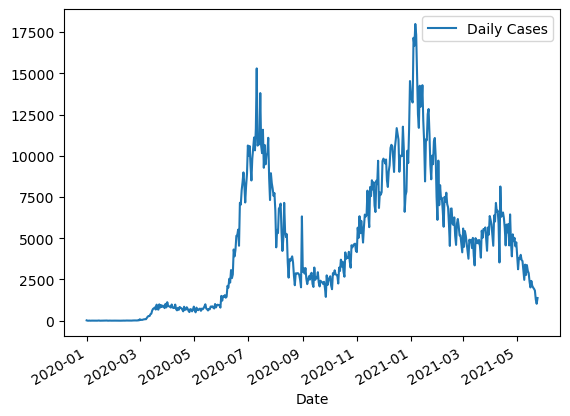

In [6]:
c_sorted['Date'] =c_sorted.index.values
c_sorted['Daily Cases'] = c_sorted['County']
c_sorted.plot('Date', 'Daily Cases')


In [7]:
c_sorted['Moving Average'] = c_sorted['County'].rolling(5).mean()

<Axes: xlabel='Date'>

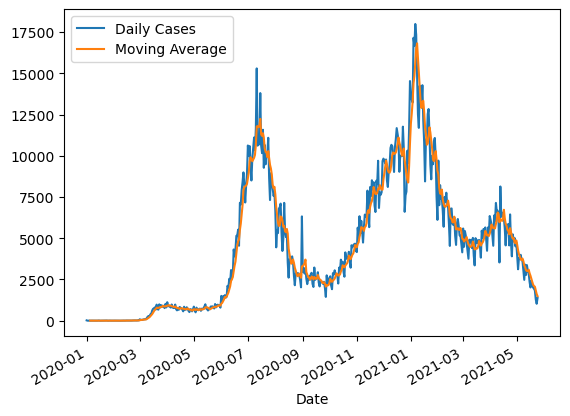

In [8]:
c_sorted.plot('Date', ['Daily Cases','Moving Average'])


In [10]:
genderlist = df_all['Gender'].to_list()
gender_code_list = []
j = len(genderlist)
for i in range(j):
    
    if genderlist[i] == "Female":
        gender_code_list.append(1)
    else:
        gender_code_list.append(0)
df_all.insert(4,"Gender Coded", gender_code_list)

In [15]:
df_gender = df_all.groupby(['EventDate']).sum(numeric_only = True)
df_gender.index = pd.to_datetime(df_gender.index, format="%m/%d/%Y")
df_gender_sorted = df_gender.sort_index(axis = 'index', ascending=True)


In [16]:
c_sorted['Number of Female Patients'] = df_gender_sorted['Gender Coded']

<Axes: xlabel='Date'>

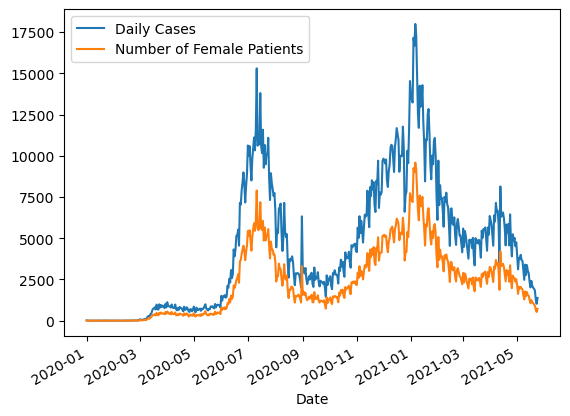

In [17]:
c_sorted.plot('Date', ['Daily Cases', 'Number of Female Patients'])
